In [1]:
import pandas
import sqlalchemy
import matplotlib.pyplot as plt

In [2]:
engine = sqlalchemy.create_engine('sqlite:///solarthermal.db')

In [5]:
sql = "SELECT * FROM solarthermal WHERE timestamp > '2024-05-24 08:00'"
df = pandas.read_sql(sql, engine)
df['timestamp'] = pandas.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df = df.rename(columns={'temp1': 't_ret', 'temp2': 't_flow', 'temp3': 't_ambient'})
df['temp_diff'] = df['t_ret'] - df['t_flow']

In [6]:
df.iloc[-24:]

,t_ret,t_flow,flow,power,t_ambient,pump,temp_diff
timestamp,,,,,,,
2024-05-29 15:15:03.975740,31.81,32.69,0.00,0.00,30.75,1,-0.88
2024-05-29 15:16:26.602122,31.75,32.62,0.00,0.00,30.44,1,-0.87
2024-05-29 15:20:03.824910,31.62,32.44,0.00,0.00,30.06,1,-0.82
2024-05-29 15:21:36.605699,31.62,32.25,0.00,0.00,30.00,1,-0.63
2024-05-29 15:25:04.682813,31.62,31.94,0.00,0.00,30.06,1,-0.32
2024-05-29 15:25:29.393757,31.69,31.94,0.00,0.00,30.12,1,-0.25
2024-05-29 15:30:07.766017,31.69,31.81,0.00,0.00,30.12,1,-0.12
2024-05-29 16:19:17.318100,31.88,31.81,0.00,0.00,30.06,1,0.07
2024-05-29 16:19:48.861146,31.88,31.81,0.00,0.00,30.00,1,0.07


Text(0, 0.5, 'Temp in degC')

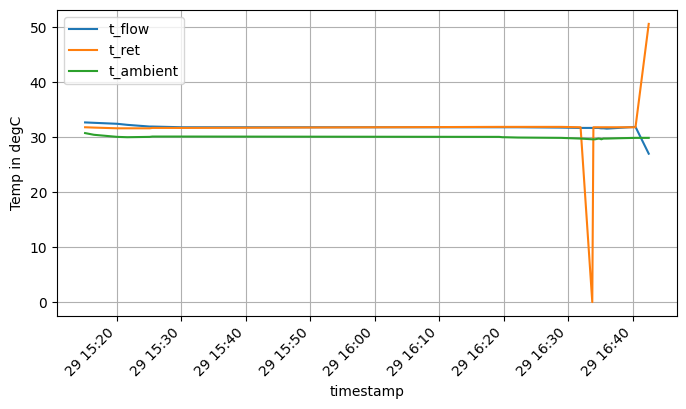

In [7]:
fig, ax = plt.subplots(figsize=(8, 4.5))

df.plot(ax=ax, y=['t_flow', 't_ret', 't_ambient'], rot=45, grid=True)
ax.set_ylabel('Temp in degC')

Text(0, 0.5, 'Delta T in degC')

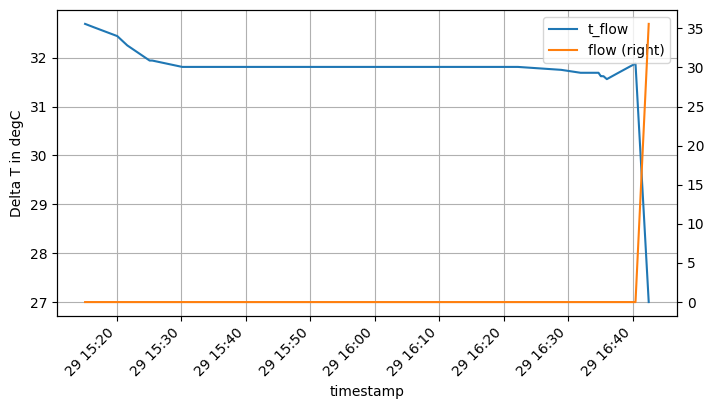

In [8]:
fig, ax = plt.subplots(figsize=(8, 4.5))

df.plot(ax=ax, y='t_flow', rot=45, grid=True)
df.plot(ax=ax, y='flow', secondary_y=True, rot=45)
ax.set_ylabel('Delta T in degC')

Text(0, 0.5, 'Delta T in degC')

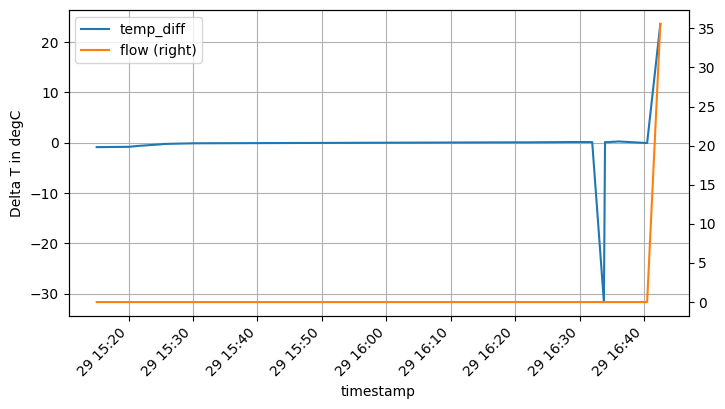

In [9]:
fig, ax = plt.subplots(figsize=(8, 4.5))

df.plot(ax=ax, y='temp_diff', rot=45, grid=True)
df.plot(ax=ax, y='flow', secondary_y=True, rot=45)
ax.set_ylabel('Delta T in degC')

<Axes: xlabel='timestamp'>

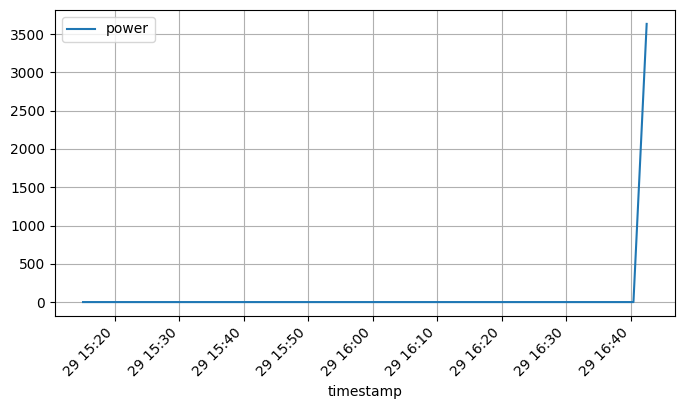

In [10]:
fig, ax = plt.subplots(figsize=(8, 4.5))

df.plot(ax=ax, y='power',rot=45, grid=True)

# How much energy

In [11]:
energy = df.resample('15T').mean()['power'].sum() / 4
energy

75.705

# How many kWh to raise one degree?
222 gal = 0.840361 cubic meter

In [12]:
m = 840 # kg
cp = 4.186 # kJ/kg/K
delta_T = 1
E_J = m * cp * delta_T
E_kWh = E_J/3600
E_kWh

0.9767333333333332

# How much should the temperature have risen?

In [13]:
delta_t_theoretical = energy / 1000/ E_kWh
delta_t_theoretical

0.07750836120401337

In [14]:
# First and last  flow temperature where we had flow of more than x g/s
moving = df[df['flow']>10]['t_flow']
moving.iloc[-1] - moving.iloc[0]

0.0

# Daily analysis

In [15]:
df_all = pandas.read_sql('solarthermal', engine)
df_all = df_all.rename(columns={'temp1': 't_ret', 'temp2': 't_flow', 'temp3': 't_ambient'})
df_all['timestamp'] = pandas.to_datetime(df_all['timestamp'])
df_all.set_index('timestamp', inplace=True)

## Max flow temperature every day

In [ ]:
df_all[df_all['flow']>10]['t_flow'].resample('D').max()

In [ ]:
df_all[df_all['flow']>10]['t_flow'].resample('D').max().plot(grid=True, marker='x')

## Daily lift 

In [ ]:
daily_max = df_all[df_all['flow']>10]['t_flow'].resample('D').max()
daily_min = df_all[df_all['flow']>10]['t_flow'].resample('D').min()
daily_max - daily_min

## Nightly drop

In [ ]:
daily_max_shift = daily_max.copy()
daily_max_shift.index = daily_max_shift.index.shift(1, freq='D')
daily_min - daily_max_shift

## Energy every day

In [ ]:
(df_all['power'].resample('15T').mean()/4).resample('D').sum().plot.bar(grid=True)

## When do we get power?

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4.5))

df_all['hour_of_day'] = df_all.index.hour
df_all.groupby('hour_of_day').mean().plot(y='power', ax=ax, grid=True)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4.5)) 

#df_all['15_min_chunk'] = (df_all.index.hour * 60 + df_all.index.minute) // 15
#df_all.groupby('15_min_chunk').mean().plot(y='power', ax=ax, grid=True)

df_all['minute_of_day'] = df_all.index.hour * 60 + df_all.index.minute
df_all.groupby('minute_of_day').mean().plot(y='power', ax=ax, grid=True)

# Does Power depend on ambient temperature?

In [ ]:
df_all[df_all['flow']>20].plot.scatter(x='t_ambient', y='power', grid=True)